<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/select_best_model_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load dataset and drop any missing values
df = load_dataset('penguins')
df = df.dropna(how='any')

print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [26]:
# TO DO: what are the penguin species in df? How many are there?
target_names=df['species'].unique()

In [44]:
# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")
# fill the `is_red` column with zeros.
white_df["is_red"] = 0 # YOUR CODE HERE
# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

array([6, 5, 7, 8, 4, 3, 9])

In [45]:
# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")
# fill the `is_red` column with ones.
red_df["is_red"] = 1 # YOUR CODE HERE
# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [88]:
df = pd.concat([red_df, white_df], ignore_index=True)
if False: df=df.loc[df['is_red']==1] # only reds
if True: df=df.loc[df['is_red']==0] # only whites

In [ ]:
# TO DO: does the data set has NaN?

In [20]:
# TO DO: what are the explanatory variables?

In [91]:
# Create features and target variables
X = df.drop(columns=['quality'])
y = df['quality']
classes=np.sort(y.unique())
classes


array([3, 4, 5, 6, 7, 8, 9])

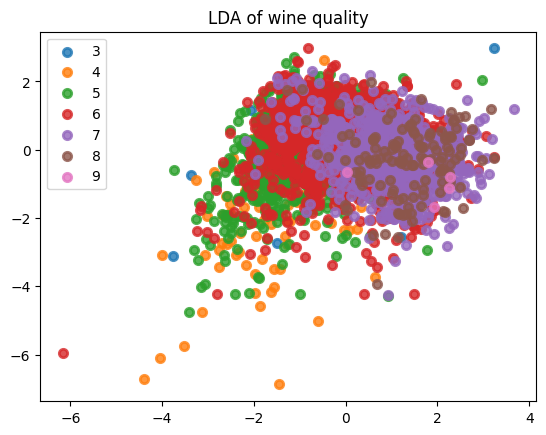

In [92]:
# Represent classes in the 1st discriminant plane:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r = lda.fit(X, y).transform(X)
colors = sns.color_palette(None, len(classes))
lw = 2
for color, cl in zip(colors, classes):
    plt.scatter(X_r[y == cl, 0], X_r[y == cl, 1], color=color, alpha=.8, lw=lw,
                label=cl)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of wine quality')
plt.show()